In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import time

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print("Jumlah data:", len(df))
df.head()


Saving Strava-Running-Data.csv to Strava-Running-Data (1).csv
Jumlah data: 105


,Sr. no.,start_date_local,type,distance,moving_time,elapsed_time,total_elevation_gain,start_latlng,end_latlng,sport_type,start_date,timezone,achievement_count,kudos_count,comment_count,athlete_count,photo_count,average_speed,max_speed
0,1,2023-12-09T09:09:19Z,Run,10879.7,4023,4617,91.4,"[40.70327935740352, -73.99619171395898]","[40.69340907968581, -73.97922154515982]",Run,2023-12-09T14:09:19Z,(GMT-05:00) America/New_York,4,4,0,3,0,2.704,6.228
1,2,2023-12-07T17:31:50Z,Run,1304.4,722,62993,0.0,"[40.7220459356904, -74.03641730546951]","[40.719722136855125, -74.03257705271244]",Run,2023-12-07T22:31:50Z,(GMT-05:00) America/New_York,0,0,0,1,0,1.807,4.044
2,3,2023-12-03T09:18:13Z,Run,17503.0,7370,7462,68.4,"[40.74991073459387, -73.98751585744321]","[40.73538766242564, -73.9793517999351]",Run,2023-12-03T14:18:13Z,(GMT-05:00) America/New_York,2,5,0,4,0,2.375,6.778
3,4,2023-12-02T09:41:14Z,Run,3457.8,1791,2170,3.9,"[40.72203076444566, -74.03641068376601]","[40.71398631669581, -74.03902692720294]",Run,2023-12-02T14:41:14Z,(GMT-05:00) America/New_York,0,2,0,3,0,1.931,4.522
4,5,2023-12-01T17:06:05Z,Run,10108.2,4128,4221,6.3,"[40.72190687991679, -74.03624514117837]","[40.71669920347631, -74.03264125809073]",Run,2023-12-01T22:06:05Z,(GMT-05:00) America/New_York,4,5,0,1,0,2.449,5.462


In [ ]:
# Membuat label biner: 1 jika "Run", 0 jika bukan
df["is_run"] = (df["type"] == "Run").astype(int)

# Pilih fitur numerik relevan
features = [
    "distance", "moving_time", "elapsed_time",
    "total_elevation_gain", "average_speed", "max_speed",
    "achievement_count", "kudos_count", "comment_count", "photo_count"
]

X = df[features].fillna(0).values
y = df["is_run"].values

# Bagi data menjadi train dan validation (80/20)
random_state = int(time.time()) % 100000
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_state
)

# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
# 4. Membangun Model Sequential
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # output biner
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan arsitektur
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Melatih Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7155 - loss: 0.5867 - val_accuracy: 1.0000 - val_loss: 0.4743
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8782 - loss: 0.4949 - val_accuracy: 0.9524 - val_loss: 0.4135
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9412 - loss: 0.4458 - val_accuracy: 0.9524 - val_loss: 0.3659
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9226 - loss: 0.4030 - val_accuracy: 0.9524 - val_loss: 0.3281
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9699 - loss: 0.3245 - val_accuracy: 0.9524 - val_loss: 0.2951
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9311 - loss: 0.3042 - val_accuracy: 0.9524 - val_loss: 0.2730
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9459 - loss: 0.2683 - val_accuracy: 0.9524 - val_loss: 0.2560
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9509 - loss: 0.2200 - val_accuracy: 0.9524 

In [ ]:
# 6. Evaluasi Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

print(f"\nAkurasi Training: {train_acc*100:.2f}%")
print(f"Akurasi Validation: {val_acc*100:.2f}%")

# Prediksi dan laporan klasifikasi
y_pred = (model.predict(X_val) > 0.5).astype(int)
print("\nLaporan Klasifikasi:\n", classification_report(y_val, y_pred))


Akurasi Training: 100.00%
Akurasi Validation: 90.48%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.95      0.95      0.95        19

    accuracy                           0.90        21
   macro avg       0.72      0.72      0.72        21
weighted avg       0.90      0.90      0.90        21



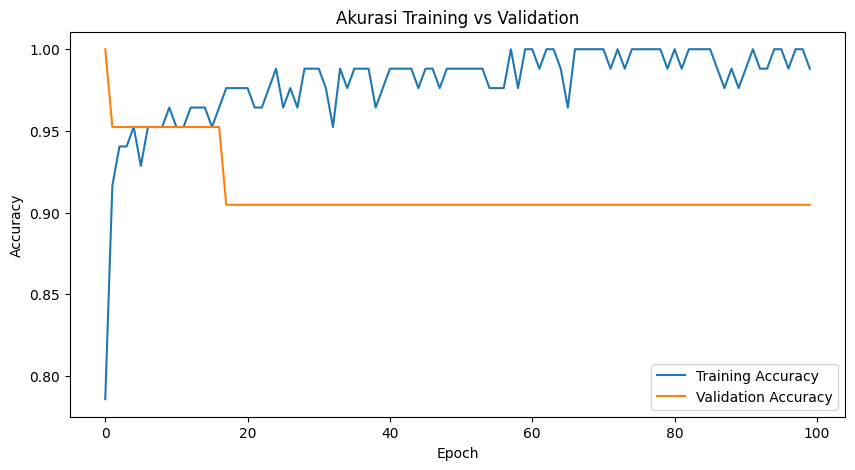

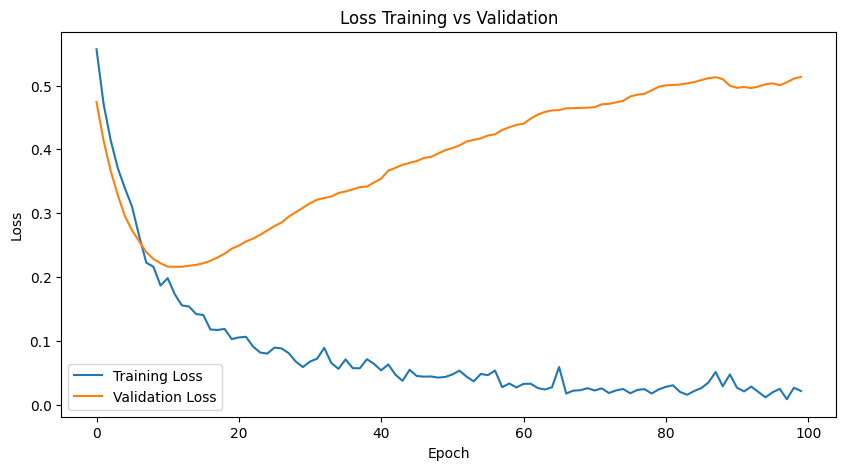

In [ ]:
# 7. Visualisasi Hasil Training
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
